In [98]:
import sys as sys
sys.path.append('/home/ubuntu/ThinkBayes2/code')
from thinkbayes2 import Pmf 
import thinkplot

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Cookie Problem
# Bowl 1 contains 30 vanilla cookies and 10 chocolate
# Bowl 2 contains 20 vanilla cookies and 20 chocolate
# choose a bowl at random, draw a vanilla cookie. What is the probability is is bowl 1
# in his example, the author creates a probability mass function that starts as the probabilities of selecting a bowl
# this is the prior
pmf = Pmf()
pmf.Set('Bowl 1',0.5)
pmf.Set('Bowl 2',0.5)

In [25]:
# the author then creates the liklihood by multiplying the prior by the p(vanilla|bowl x)
pmf.Mult('Bowl 1',0.75) 
pmf.Mult('Bowl 2',0.5)

In [26]:
pmf.Print

<bound method _DictWrapper.Print of Pmf({'Bowl 1': 0.375, 'Bowl 2': 0.25})>

In [28]:
# to complete bayes, you need to divide by the probabilities of all the ways you get vanilla
# in this case, that is p(v | bowl1) + p(V | bowl2), which are, in this case values we already computed.
# 'normalizing' does the same thing operation (dividing all the entries of the pmf by the sum of the values)
pmf.Normalize()
print('the posterior distribution is')
pmf.Print

the posterior distribution is


<bound method _DictWrapper.Print of Pmf({'Bowl 1': 0.6000000000000001, 'Bowl 2': 0.4})>

In [32]:
# Monty Hall problem: In his example, there are 3 doors. You choose door A, Monty must then reveal either B or C
# In this example, he chooses B which reveals no car.
# You would like the pmf of the remaining doors.

# try the monty problem using the author's Suite, you need to provide a likelihood function
# recall, likelihood is P(D|H)
from thinkbayes2 import Suite

class Monty(Suite):
    def Likelihood(self,data, hypo):
        # hypo here is which door, A, B or C
        # Data is the door Monty chooses. I think this is written such than he can choose B or C
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1
        
suite = Monty('ABC')
suite.Update('B')
suite.Print()


A 0.3333333333333333
B 0.0
C 0.6666666666666666


In [47]:
# M&M problem: we have two bags of M&M's with varying numbers of each color, one from 1994, one from 1996
class M_and_M(Suite):
    mix94=dict(brown=30,yellow=20,red=20,green=10,orange=10,tan=10)
    mix96=dict(blue=24,green=20,orange=16,yellow=14,red=13,brown=13)
    hypoA=dict(bag1=mix94, bag2=mix96)
    hypoB=dict(bag1=mix96, bag2=mix94)
    hypotheses = dict(A=hypoA, B=hypoB)
    
    def Likelihood(self,data,hypo):
        bag,color = data
        mix = self.hypotheses[hypo][bag]
        if color in mix:
            like = mix[color]
        else:
            like = 0.0
        #print(color,like)
        return like

suite = M_and_M('AB')
suite.Print()
suite.Update(('bag1','yellow'))
suite.Print()
suite.Update(('bag2','green'))
suite.Print()
suite.Update(('bag1','yellow'))
suite.Print()
suite.Update(('bag1','blue'))
suite.Print()

A 0.5
B 0.5
A 0.5882352941176471
B 0.4117647058823529
A 0.7407407407407407
B 0.2592592592592592
A 0.8032128514056225
B 0.1967871485943775
A 0.0
B 1.0


In [49]:
#dice problem:

class Dice(Suite):
    def Likelihood(self,data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo
suite = Dice([4,6,8,12,20])
suite.Print()
suite.Update(6)
suite.Print()

4 0.2
6 0.2
8 0.2
12 0.2
20 0.2
4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944


In [68]:
suite.Update(1)


0.05

In [69]:
suite.Print()

4 0.0
6 0.0
8 0.0
12 0.0
20 1.0


In [86]:
#railroad problem: a railroad numbers its locamotives 1..N. 
#One day yhou see a locamotive with the number 60. Estimate how many locamotives the railroad has
# unique becuase you have no idea how big N is.. so start with a guess! Now we're basian!
class Train(Suite):
    def Likelihood(self,data,hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo
    def Mean(Suite):
        total = 0
        for hypo, prob in suite.Items():
            total += hypo * prob
        return total
            
suite = Train(range(1,100))
print (suite.Mean())
suite.Update(60)
print (suite.Mean())
suite.Update(20)
print (suite.Mean())
suite.Update(99)
print (suite.Mean())
#suite.Update(120)  # can't do this - should write better routines to update prior
#print (suite.Mean())


50.0
77.79471110442536
76.10443458712732
99.0


In [94]:
# biased coin
# a coin is flipped 250 times, 140 times it comes up heads, 110 tails. What is the probability it is biased?

class Coin(Suite):
    def Likelihood(self,data,hypo):
        # here, hypo is the hypothesised bias
        if data == 'H':
            return hypo/100.0
        else:
            return 1 - hypo/100.0
suite = Coin(range(0,101))
dataset = 'H'*140 + 'T' * 110
for data in dataset:
    suite.Update(data)

56

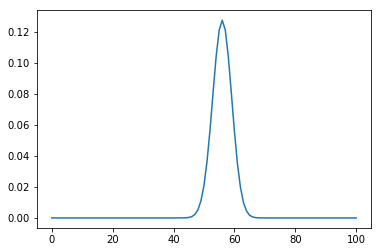

In [121]:
# plot the pmf, this will show the most likely bias point
plt.plot(range(0,101),[suite.d[x] for x in suite.d])
suite.MaximumLikelihood()

56

In [122]:
a=np.ones((32,32,3))

In [126]:
print(a.shape)



(32, 32, 3)


In [125]:
b=a.reshape(32*32*3,1)

In [127]:
print(b.shape)

(3072, 1)


In [128]:
a = np.random.randn(2, 3) # a.shape = (2, 3)
b = np.random.randn(2, 1) # b.shape = (2, 1)
c = a + b

In [129]:
c.shape

(2, 3)

In [130]:
a = np.random.randn(4, 3) # a.shape = (4, 3)
b = np.random.randn(3, 2) # b.shape = (3, 2)
c = a*b

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 

In [131]:
a = np.random.randn(12288, 150) # a.shape = (12288, 150)
b = np.random.randn(150, 45) # b.shape = (150, 45)
c = np.dot(a,b)

In [132]:
c.shape

(12288, 45)

In [146]:
# a.shape = (3,4)
# b.shape = (4,1)
a = np.random.randn(3, 4) 
#b = np.random.randn(4, 1) 
a = np.array([[1,2,3,4],[10,20,30,40],[100,200,300,400]])
b = np.array([[3],[4],[5],[6]])
c = np.zeros((3,4))
for i in range(3):
  for j in range(4):
    c[i][j] = a[i][j] + b[j]
print(c.shape)
print(c)
d=a+b.T
print(d)

(3, 4)
[[   4.    6.    8.   10.]
 [  13.   24.   35.   46.]
 [ 103.  204.  305.  406.]]
[[  4   6   8  10]
 [ 13  24  35  46]
 [103 204 305 406]]


In [150]:
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
a = np.array([[1,2,3],[10,20,30],[100,200,300]])
b = np.array([[3],[4],[5]])

c = a*b
print(c)

[[   3    6    9]
 [  40   80  120]
 [ 500 1000 1500]]


In [153]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)
print(B.shape)

(4, 1)
